# Théorie

La décomposition en valeure singulière d'une matrice $M$ de taille $m x n$ consiste à écrire
la matrice $M$ sous la forme :
$$
M = U \cdot \Sigma \cdot V^*, 
$$
telle que $U$ et $V$ sont des matrices unitaires et $\Sigma$ une matrice diagonale.

On rapelle qu'une matrice $U$ est unitaire si $U \cdot U^* = Id$. Et on rapelle que $U^* = \overline{U^t}$.


Dans la suite, on traitera l'exemple de la matrice $M$ suivante :
$$
\left(\begin{array}{rrr}
3 & 1 & 1 \\
-1 & 3 & 1
\end{array}\right)
$$

In [1]:
M = matrix(SR, [(3, 1, 1), (-1, 3, 1)]); M

[ 3  1  1]
[-1  3  1]

Pour obtenir cette décomposition, on calcule la martice $A$ suivante : 
$$
A = M^*.M
$$

In [2]:
A = M.transpose()*M; A

[10  0  2]
[ 0 10  4]
[ 2  4  2]

In [3]:
N = A.dimensions()[0]; N

3

La matrice $A$ est symétrique et définie positive (pour tout vecteur $X$ on a $X^t \cdot A \cdot X \ge 0$).

Donc, $A$ est diagonalisable et les valeures propres sont toutes des réels positifs.
Il existe donc une matrice diagonale $D$ et un matrice de passage $P$ telle que :

$$
P^{-1} \cdot A \cdot P = D.
$$
Avec $P$ une martice orthonormale : $P \cdot \overline{P^t} = Id$, c'est à dire que $P^{-1} = \overline{P^t}$ et donc :
$$
\overline{P^{t}} \cdot A \cdot P = D.
$$


In [4]:
D,P = A.eigenmatrix_right()

In [5]:
A.eigenmatrix_right?

In [6]:
D

[ 0  0  0]
[ 0 10  0]
[ 0  0 12]

In [6]:
P

[   1    1    1]
[   2 -1/2    2]
[  -5    0    1]

Ici la matrice $P$ est orthogonale.

In [7]:
P.transpose()*P

[ 30   0   0]
[  0 5/4   0]
[  0   0   6]

Notament sa transposée n'est pas l'invere de $P*.

In [8]:
P*P.transpose()

[   3  7/2   -4]
[ 7/2 33/4   -8]
[  -4   -8   26]

Nous allons orthonormaliser la matrice de passage pour que $P^{-1} = P^t$.

In [9]:
T1 = P.transpose(); T1

[   1    2   -5]
[   1 -1/2    0]
[   1    2    1]

In [10]:
L = list( T1 ); L

[(1, 2, -5), (1, -1/2, 0), (1, 2, 1)]

In [11]:
L = map( lambda x: x/x.norm(), L ); L

[(1/30*sqrt(30), 1/15*sqrt(30), -1/6*sqrt(30)),
 (2/5*sqrt(5), -1/5*sqrt(5), 0),
 (1/6*sqrt(6), 1/3*sqrt(6), 1/6*sqrt(6))]

In [12]:
T1 = Matrix(SR, L); T1

[1/30*sqrt(30) 1/15*sqrt(30) -1/6*sqrt(30)]
[  2/5*sqrt(5)  -1/5*sqrt(5)             0]
[  1/6*sqrt(6)   1/3*sqrt(6)   1/6*sqrt(6)]

In [13]:
T1 = T1.transpose(); T1

[1/30*sqrt(30)   2/5*sqrt(5)   1/6*sqrt(6)]
[1/15*sqrt(30)  -1/5*sqrt(5)   1/3*sqrt(6)]
[-1/6*sqrt(30)             0   1/6*sqrt(6)]

In [14]:
T1.transpose() * T1

[1 0 0]
[0 1 0]
[0 0 1]

In [15]:
T1 * T1.transpose()

[1 0 0]
[0 1 0]
[0 0 1]

In [16]:
T1.transpose()*A*T1

[ 0  0  0]
[ 0 10  0]
[ 0  0 12]

On va ordonner les vecteurs de T1 par ordre décroissant des valerues propres.

In [17]:
vecteurs_propres = list( T1.transpose()); vecteurs_propres

[(1/30*sqrt(30), 1/15*sqrt(30), -1/6*sqrt(30)),
 (2/5*sqrt(5), -1/5*sqrt(5), 0),
 (1/6*sqrt(6), 1/3*sqrt(6), 1/6*sqrt(6))]

In [18]:
valeures_propres = D.diagonal(); valeures_propres

[0, 10, 12]

In [19]:
l = [ [ valeures_propres[i], vecteurs_propres[i]  ] for i in range(N)]; l

[[0, (1/30*sqrt(30), 1/15*sqrt(30), -1/6*sqrt(30))],
 [10, (2/5*sqrt(5), -1/5*sqrt(5), 0)],
 [12, (1/6*sqrt(6), 1/3*sqrt(6), 1/6*sqrt(6))]]

In [20]:
l.sort()

In [21]:
l.reverse()

In [22]:
l

[[12, (1/6*sqrt(6), 1/3*sqrt(6), 1/6*sqrt(6))],
 [10, (2/5*sqrt(5), -1/5*sqrt(5), 0)],
 [0, (1/30*sqrt(30), 1/15*sqrt(30), -1/6*sqrt(30))]]

In [23]:
tmp = Matrix( SR, [ l[i][1] for i in range(N)] ); tmp

[  1/6*sqrt(6)   1/3*sqrt(6)   1/6*sqrt(6)]
[  2/5*sqrt(5)  -1/5*sqrt(5)             0]
[1/30*sqrt(30) 1/15*sqrt(30) -1/6*sqrt(30)]

In [24]:
P = tmp.transpose(); P

[  1/6*sqrt(6)   2/5*sqrt(5) 1/30*sqrt(30)]
[  1/3*sqrt(6)  -1/5*sqrt(5) 1/15*sqrt(30)]
[  1/6*sqrt(6)             0 -1/6*sqrt(30)]

In [25]:
Pt = P.transpose(); Pt

[  1/6*sqrt(6)   1/3*sqrt(6)   1/6*sqrt(6)]
[  2/5*sqrt(5)  -1/5*sqrt(5)             0]
[1/30*sqrt(30) 1/15*sqrt(30) -1/6*sqrt(30)]

In [26]:
D=Pt * A * P; D

[12  0  0]
[ 0 10  0]
[ 0  0  0]

In [27]:
vp = D.diagonal(); vp

[12, 10, 0]

On a bien réussi à trouver une matrice de passage orthonormale $P$ et une matrice diagonale $D$ à coefficient réelle positive, ordonnée par ordre décroissante des valeures propres, telle que :

$$
M.\overline{M^t} = A = P \cdot D \cdot \overline{P^t}
$$

On va extraire les vecteurs propres de valeurs propreus non nulle.

On rapelle que les vecteurs propres sont les collones de $P$.

In [28]:
V1 = Matrix(SR, [ Pt[i] for i in range(N) if vp[i] != 0 ] ).transpose() #vp: valeures propres  et Pt transposée de P 

In [29]:
V1

[ 1/6*sqrt(6)  2/5*sqrt(5)]
[ 1/3*sqrt(6) -1/5*sqrt(5)]
[ 1/6*sqrt(6)            0]

On extrait la matrice diagonale associée à $V_1$ que l'on apellera $D_1$.

In [30]:
vp1 = [ v for v in vp if v != 0 ] 
D1 =  matrix( SR, len(vp1), lambda i,j: vp1[i] if i==j else 0 )
D1

[12  0]
[ 0 10]

On définit maintenant un nouvelle matrice $U_1$ de la façon suivante :
$$
U_1 = D_1^{-\frac{1}{2}} * V_1^t * M^t
$$


In [31]:
vp2 = [ 1/sqrt(v) for v in vp if v != 0 ] 
D2 =  matrix( SR, len(vp2), lambda i,j: vp2[i] if i==j else 0 )
D2

[  1/6*sqrt(3)             0]
[            0 1/10*sqrt(10)]

In [32]:
U1 = D2*V1.transpose()*M.transpose(); U1

[   1/6*sqrt(6)*sqrt(3)    1/6*sqrt(6)*sqrt(3)]
[ 1/10*sqrt(10)*sqrt(5) -1/10*sqrt(10)*sqrt(5)]

Le théorème de la décomposition en valeur singulière dit que :
$$
U_1 \cdot M \cdot V_1 = D_1^{\frac{1}{2}},
$$

En effet,
$$
U_1 \cdot M \cdot V_1 =  D_1^{-\frac{1}{2}} \cdot V_1^t \cdot M^t \cdot M \cdot V_1=  D_1^{-\frac{1}{2}} * V_1^t \cdot A \cdot V_1 = D_1^{-\frac{1}{2}} * D_1 = D_1^{\frac{1}{2}}
$$

In [33]:
vp2 = [ sqrt(v) for v in vp if v != 0 ] 
DD2 =  matrix( SR, len(vp2), lambda i,j: vp2[i] if i==j else 0 )
DD2

[2*sqrt(3)         0]
[        0  sqrt(10)]

In [34]:
U1*M*V1 == DD2

True

C'est presque termine.
Le problème c'est que $U_1$ et $V_1$ ne sont pas des matrices carrés et donc on ne peut pas les inverser !

Cependnat U_1 vue en tant que vecteus lignes forment u ensemble de vecteur orthonormal. Par construction.
Il suffit donc de completer la base de sort a otenir une base orthonormale, et obtenir une matric $U$ où les 
première ligne sont les lignes de $U_1$ et les dernière lignes les vecteurs additionnels.

On pourra utiliser le procéder d'orhtonrmalisation de gram-schmidt.

Ici $U_1$ est est déjà carré, donc $U = U_1$.

A partir de $U$, il est fcaile de déterminer $M$, car,
$$
M = U * D * P.
$$


In [35]:
U = U1

In [36]:
U1

[   1/6*sqrt(6)*sqrt(3)    1/6*sqrt(6)*sqrt(3)]
[ 1/10*sqrt(10)*sqrt(5) -1/10*sqrt(10)*sqrt(5)]

In [37]:
M

[ 3  1  1]
[-1  3  1]

In [38]:
U*M*P

[2*sqrt(3)         0         0]
[        0  sqrt(10)         0]

In [40]:
Matrix(SR, map( lambda x: x/x.norm(), P.transpose())).transpose()

[  1/6*sqrt(6)   2/5*sqrt(5) 1/30*sqrt(30)]
[  1/3*sqrt(6)  -1/5*sqrt(5) 1/15*sqrt(30)]
[  1/6*sqrt(6)             0 -1/6*sqrt(30)]

In [41]:
P.inverse() * A * P == D

True

In [42]:
P * P.transpose()

[1 0 0]
[0 1 0]
[0 0 1]

In [43]:
P.transpose()

[  1/6*sqrt(6)   1/3*sqrt(6)   1/6*sqrt(6)]
[  2/5*sqrt(5)  -1/5*sqrt(5)             0]
[1/30*sqrt(30) 1/15*sqrt(30) -1/6*sqrt(30)]

# Application

In [3]:
import numpy
import pylab
A_image = numpy.mean(pylab.imread('coffee.png'), 2)

In [16]:
A_image.shape

(400, 600)

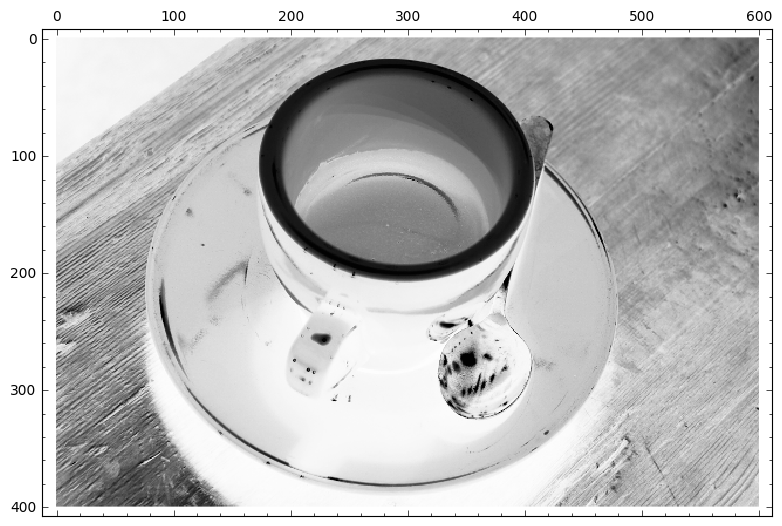

In [5]:
matrix_plot(A_image)

In [8]:
U,s,V = numpy.linalg.svd(A_image)

In [9]:
D = numpy.zeros(A_image.shape)

In [10]:
D[:len(s),:len(s)] = numpy.diag(s)

In [11]:
D

array([[ 196.96356201,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   62.38221359,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,   32.8842392 , ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

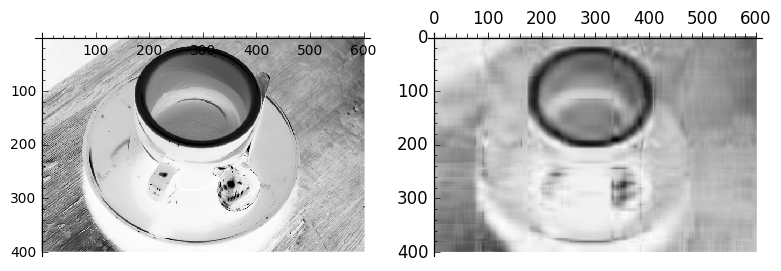

In [12]:
i = 10
A_approx = numpy.dot(numpy.dot(U[:,:i], D[:i,:i]), V[:i,:])
graphics_array([matrix_plot(A_image), matrix_plot(A_approx)])

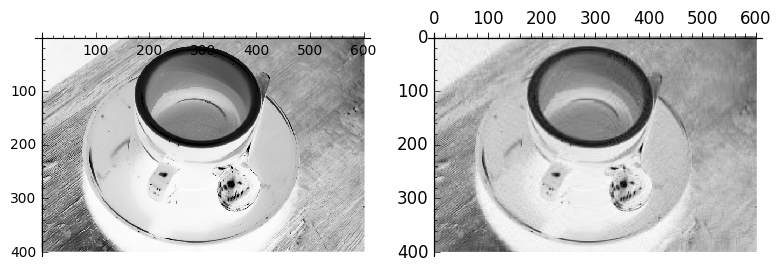

In [13]:
i = 50
A_approx = numpy.dot(numpy.dot(U[:,:i], D[:i,:i]), V[:i,:])
graphics_array([matrix_plot(A_image), matrix_plot(A_approx)])

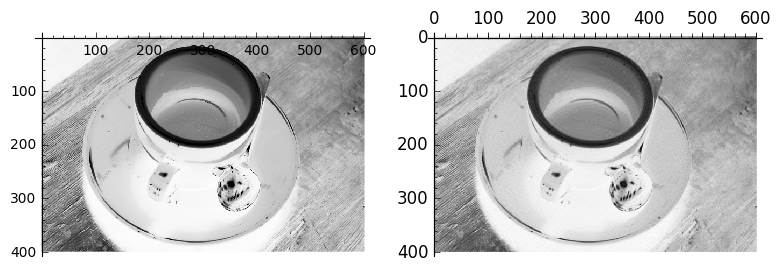

In [14]:
i = 100
A_approx = numpy.dot(numpy.dot(U[:,:i], D[:i,:i]), V[:i,:])
graphics_array([matrix_plot(A_image), matrix_plot(A_approx)])